<a href="https://colab.research.google.com/github/Suparajaburalaga/Mini-Project/blob/main/Intelligent_Financial_Analytics(SONY_company).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Intelligent Financial Analytics

In [9]:
import os

file_path = '/content/SONY_daily_data.csv'

# Check if file exists
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found.")


File found!


Loading and Preprocessing the Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/SONY_daily_data.csv'
data = pd.read_csv(file_path, parse_dates=['Date'])

# Preview the dataset
print(data.head())

# Sort data by date in case it isn't sorted
data = data.sort_values('Date')

# Handle any missing values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill as an example

# Summary statistics
print(data.describe())


        Date      Open      High       Low     Close  Adj Close  Volume
0 1980-12-11  6.477273  6.647727  6.420455  6.647727   4.390267  578160
1 1980-12-12  6.647727  6.818182  6.647727  6.761364   4.465315  584980
2 1980-12-15  6.818182  6.988636  6.818182  6.818182   4.502837  872960
3 1980-12-16  6.818182  6.988636  6.818182  6.988636   4.615407  231880
4 1980-12-17  6.988636  7.159091  6.818182  6.818182   4.502837  883300
                                Date          Open          High  \
count                          11041  11041.000000  11041.000000   
mean   2002-10-26 08:00:36.518431360     37.023815     37.314847   
min              1980-12-11 00:00:00      5.113636      5.113636   
25%              1991-11-11 00:00:00     18.490000     18.693182   
50%              2002-10-22 00:00:00     29.937500     30.125000   
75%              2013-10-09 00:00:00     46.759998     47.125000   
max              2024-09-27 00:00:00    154.500000    157.375000   
std                     

<ipython-input-10-4c8a64175d0d>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


Visualizing the Stock Data

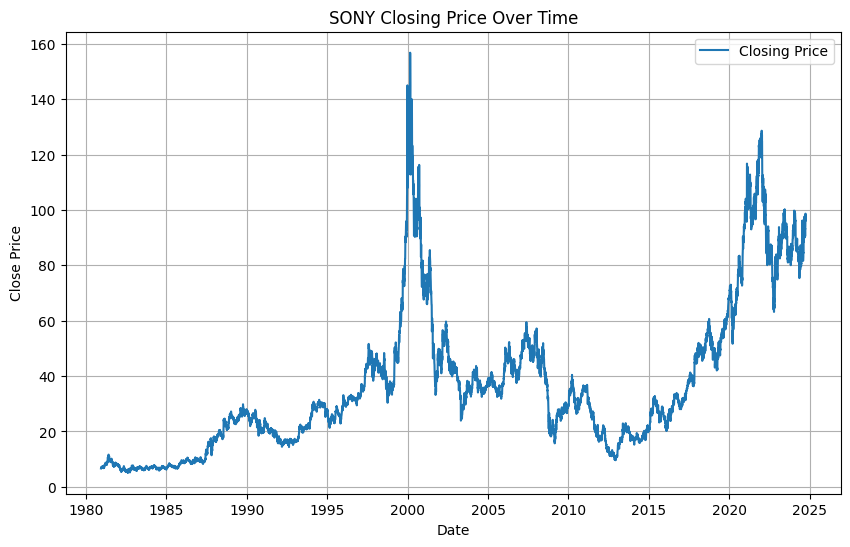

In [11]:
# Plot the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('SONY Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


Calculating Moving Averages

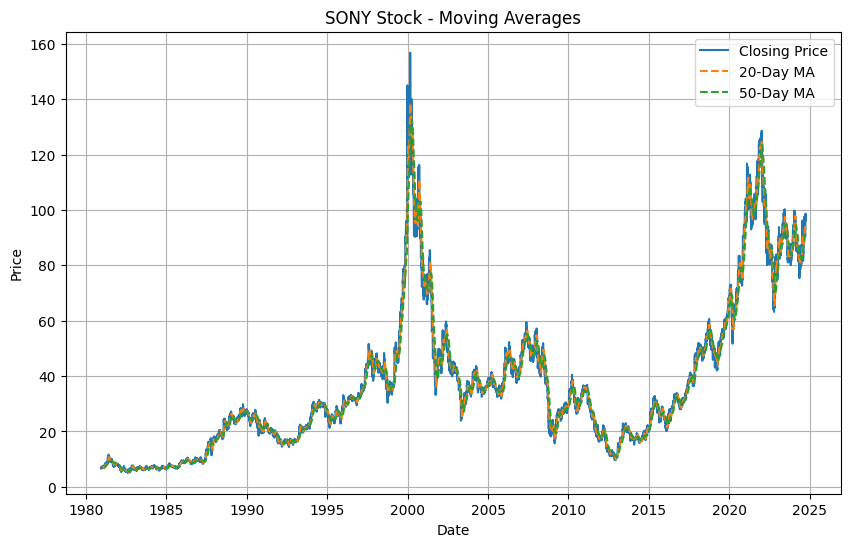

In [12]:
# Calculate the moving averages (20-day and 50-day)
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot closing prices and moving averages
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.plot(data['Date'], data['MA20'], label='20-Day MA', linestyle='--')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', linestyle='--')
plt.title('SONY Stock - Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


 Predicting Stock Prices Using Linear Regression

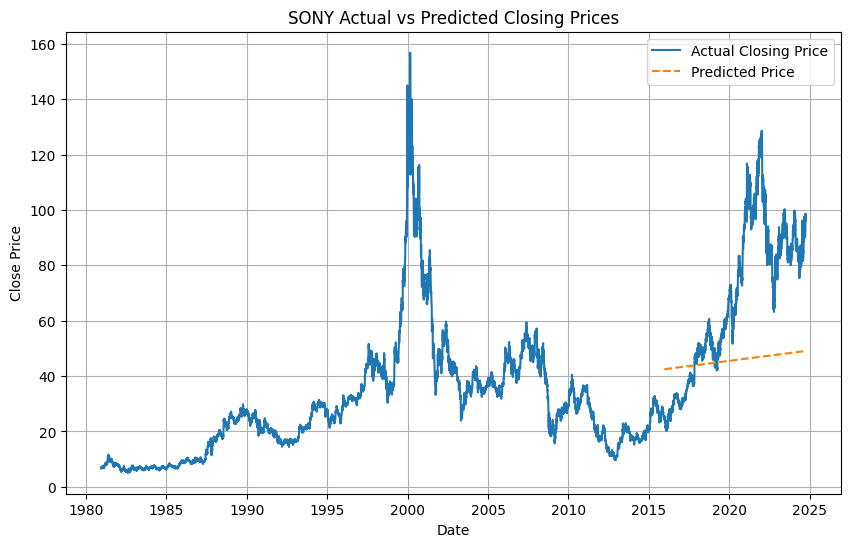

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Feature engineering: Convert date to ordinal for use in the model
data['Date_Ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Define features (X) and target (y)
X = data[['Date_Ordinal']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future prices
y_pred = model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Closing Price')
plt.plot(data.iloc[-len(y_test):]['Date'], y_pred, label='Predicted Price', linestyle='--')
plt.title('SONY Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


Evaluating the Model

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 1128.890471366224
Mean Absolute Error: 27.109607210651692


Anomaly Detection (Bonus)

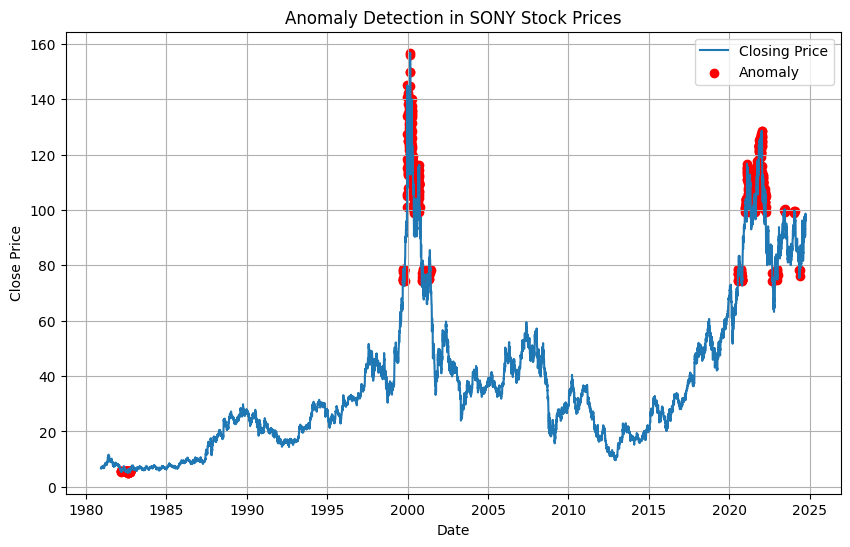

In [16]:
from sklearn.ensemble import IsolationForest

# Train the Isolation Forest model to detect anomalies in closing prices
model_if = IsolationForest(contamination=0.05)  # Assuming 5% of data are anomalies
data['Risk_Score'] = model_if.fit_predict(data[['Close']])

# Mark anomalies
data['Anomaly'] = data['Risk_Score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Plot anomalies on the closing prices graph
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
anomalies = data[data['Anomaly'] == 'Anomaly']
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='Anomaly')
plt.title('Anomaly Detection in SONY Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
